3rd ASTERICS-OBELICS International School - Annecy, France - 8-12 April 2019

### Machine Learning Tutorial

# Section 1.a - Introduction to Machine Learning 
by [Emille Ishida](https://www.emilleishida.com/)

### *Take home message 1: Know thy data!*

**Goal:** 1. get acquainted with the data  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. formulate a learning framework  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. weight our expectations

**Data**: SDSS DR14 as available through [Kaggle](https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey#Skyserver_SQL2_27_2018%206_51_39%20PM.csv) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10000 objects (lines)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18 features (columns)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Features we are interested in:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$objid$: object identifier  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$u$:  u-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$g$: g-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$r$: r-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$i$: i-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$z$: z-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$class$: source classification  - only galaxies and QSOs

**Task**: Galaxy-QSO Classification

In [1]:
# import some basic libaries 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

Let's beging by loading and taking a look in the first entries in our data

In [2]:
# Read data
data = pd.read_csv('../data/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip', compression='zip')

### Tip #1: Be suspicious, always!

You should always begin by ensuring you know in what grounds you stand. 
Before any analysis starts, ask yourself questions like:

------------------------------------------------------------------------------------------------------------------
#### What are the features in your data?  

In [3]:
data.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------
#### Are you interested in all the features? If not, drop the irrelevant ones.


In [4]:
# drop irrelevant columns
data.drop(['ra','dec','run','rerun','camcol','field','specobjid','redshift', 'plate','mjd','fiberid'], 
          axis=1, inplace=True)

In [15]:
# check remaining features
data.keys()

Index(['objid', 'u', 'g', 'r', 'i', 'z', 'class'], dtype='object')

-------------------------------------------------------------------------------------------------------

#### What about the number of objects in your data?

In [5]:
data.shape[0]

10000

Answer: *Documentation is correct*

-----------------------------------------------------------------------------------

#### How many classes are in your data? Are you interested in all of them? If no, drop the ones you are not interested in

In [6]:
data.groupby('class').nunique()

,objid,u,g,r,i,z,class
class,,,,,,,
GALAXY,1,4920,4942,4949,4953,4970,1
QSO,1,849,848,849,849,850,1
STAR,1,4123,4128,4127,4131,4131,1


In [7]:
# mask for stars
star = (data['class'] == 'STAR')

# remove stars from current data frame
data = data[star == False]

#check remaining classes
data.groupby('class').nunique()

,objid,u,g,r,i,z,class
class,,,,,,,
GALAXY,1,4920,4942,4949,4953,4970,1
QSO,1,849,848,849,849,850,1


-----------------------------------------------------------------------------------------------------------------

### Tip #2: do not ignore your domain knowledge!

In astronomy, an observational science, the data only tells part of the story. 
We know, for example, that colors carry a lot of information. We also know that at we should keep at least one magnitude so we do not loose overall brightness information.  So, let's try to use r-band magnitudes and colors  and check correlations again.

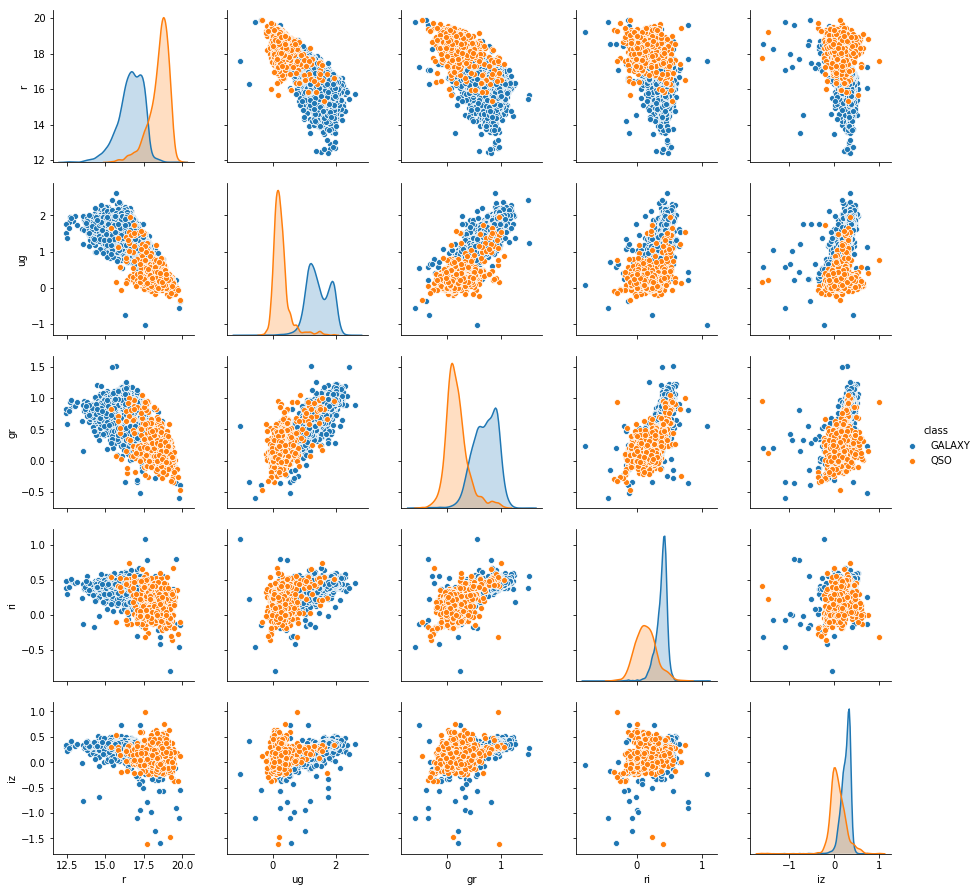

In [29]:
# construct r-magnitude + color data frame
data = data.assign(ug = data['u'] - data['g'])  
data = data.assign(gr = data['g'] - data['r'])
data = data.assign(ri = data['r'] - data['i'])
data = data.assign(iz = data['i'] - data['z'])

# plot
sns.pairplot(data_color, hue='class', vars=['r','ug', 'gr','ri','iz'])
plt.show()

-------------------------------------------------------------------------------------------------------------------

### Tip #3:  be concious on the data you are using

#### Are you sure all the data you need is suitable for the task at hand? Do you see outliers which should be removed? If so, remove them from the data frame

In [32]:
# r-magnitude mask for outliers
rmag_remain = (data['r'] < 22.5)

# g-r maks for outliers
gr_remain = (data['gr'] > -2.5)

# r-i mask for outliers
ri_remain = (data['ri'] > -2)

# i-z mask for outliers
iz_remain = (data['iz'] < 1.5)

# construct one flag for surviving objects
survive1 = np.logical_and(rmag_remain, gr_remain)
survive2 = np.logical_and(ri_remain, iz_remain)
survive = np.logical_and(survive1, survive2)

# remove outliers from data frame
data = data[survive]

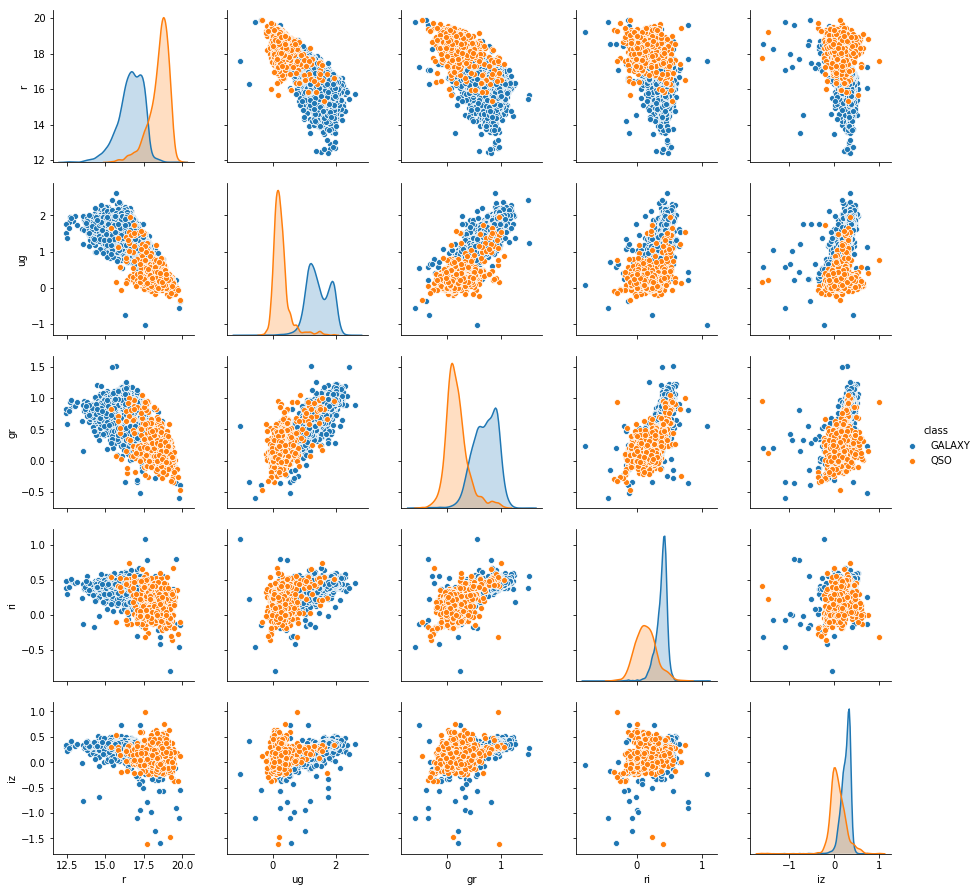

In [33]:
# plot remaining points
sns.pairplot(data, hue='class', vars=['r','ug', 'gr','ri','iz'])
plt.show()

### Can you think of any other test which can give insight on the general aspects of the data?

Answer: 

### Save the clean data to disk

Once you are happy with your exploration of the most simple aspects of your data, save the data for future analysis... and do not forget to document your decisions!

In [35]:
data.to_csv('../data/SDSS_galaxy_QSO_clean.csv', index=False)

### How did your expectations change? You are more or less confident in the feasibility of developing an authomatic classifier for this data set in comparison to when you started?

Answer: Now we know that r-mag and 2 colors are probably enough to ensure classification. About the performance of the classifier, I cannot tell before seeing the target sample

### Supposing we have a classifier that works, what metric do you suggest we could use to numerically access the performance of the classifier?

Answer: accuracy over both classes

In [36]:
def accuracy(predicted, truth):
    """Calculates overall accuracy of a classifier.
    
    input: predicted, 1-d array of predicted classes for objects in the target sample
           truth, 1-d array of truth classes for objects in the target sample
                
    output: scalar, percentage of correct classifications.
    """
    
    res = sum(np.equal(predicted, truth))/float(predicted.shape[0])
    
    return res
    

### Would your the answer you gave above change if you were specifically interested in QSO but not so much in galaxies?

Answer: overall yes. Accuracy is still important but purity (or contamination levels) would be a concern. For example, if the classifier gets one class correctly more frequent then the other class.